In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import datetime
from dotenv import load_dotenv
import os

import matplotlib.pyplot as plt

from utils.omni_data import OMNI_Data
from utils.plotting_ssusi_edr import SUSSI_Plotter

### Setup
Instantiates all of the classes needed to plot

In [4]:
load_dotenv()

drive_path = "../../../../../media/admin/Elements2"

omni = OMNI_Data()
sussi = SUSSI_Plotter(drive_path)

### NASA OMNI Data 
Uses the `OMNI_Data` class to get a dataframe with dates and the AE index at that date and time. Plots below and shows were the cutoff set it

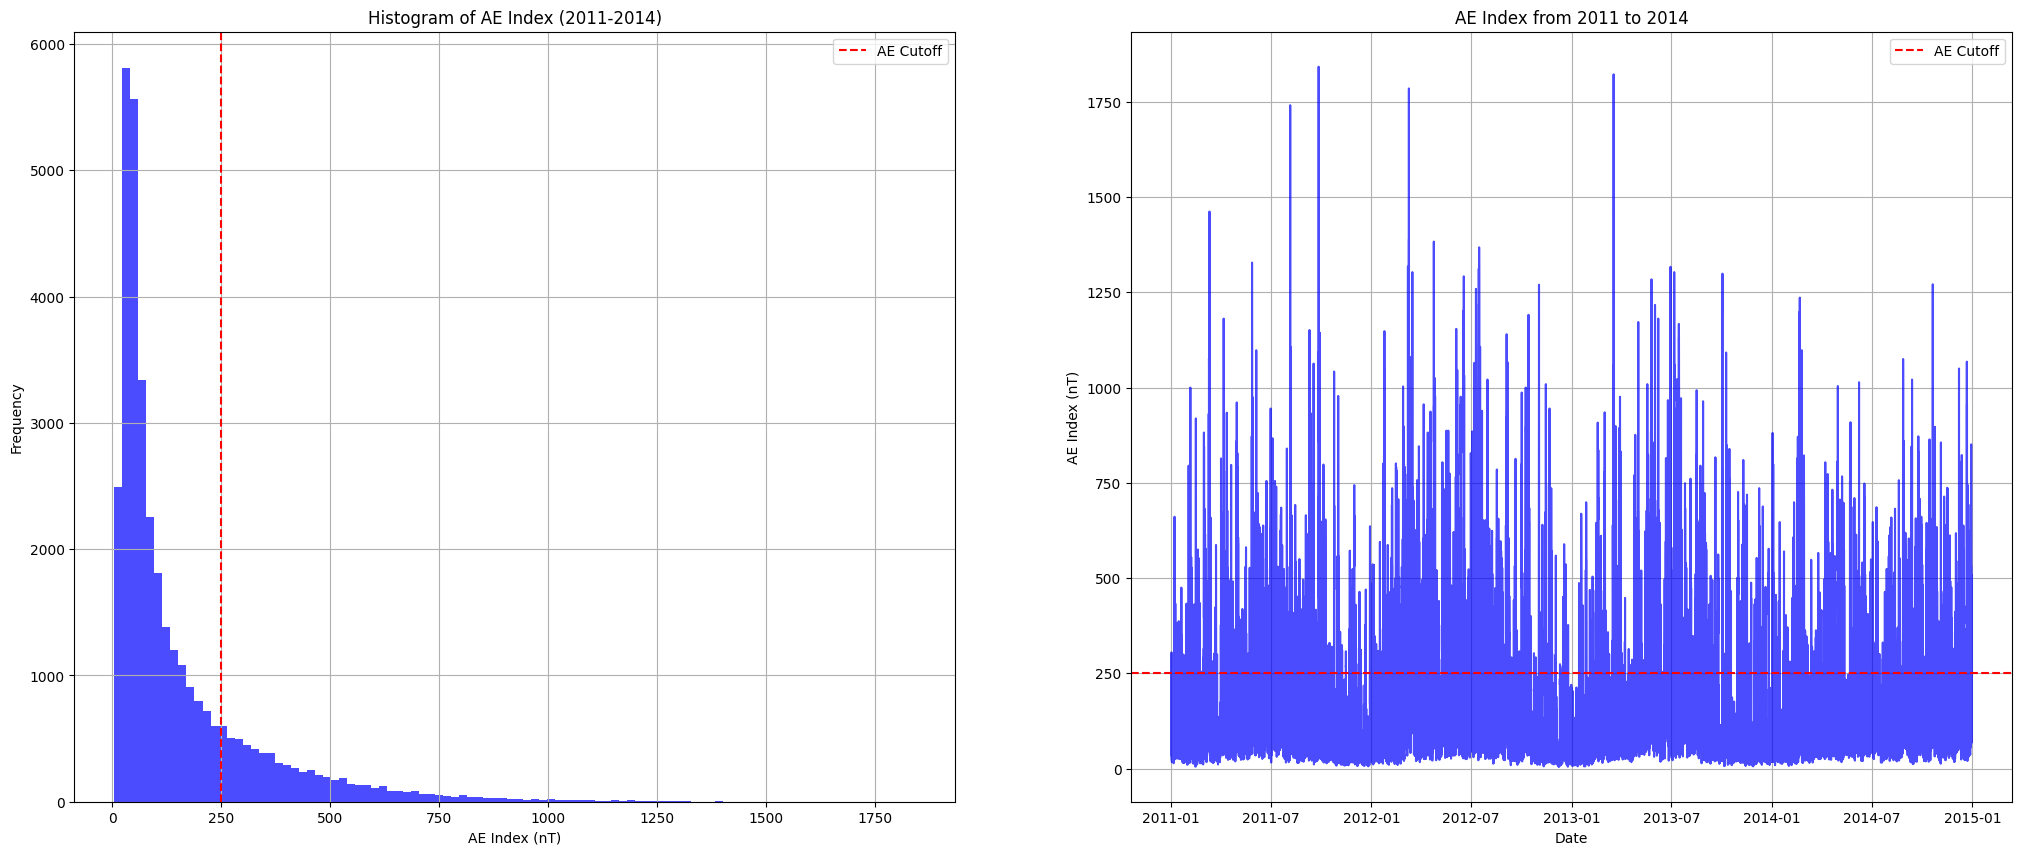

In [5]:
AE_CUTOFF = 250

ae_df = omni.get_df_data(["AE1800"], "2011-01-01", "2014-12-31")
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax[0].hist(ae_df["AE1800"], bins=100, color='blue', alpha=0.7)
ax[0].axvline(x=AE_CUTOFF, color='r', linestyle='--', label="AE Cutoff")
ax[0].set_title("Histogram of AE Index (2011-2014)")
ax[0].set_xlabel("AE Index (nT)")
ax[0].set_ylabel("Frequency")
ax[0].legend()
ax[0].grid()
ax[1].plot(ae_df["Epoch"], ae_df["AE1800"], color='blue', alpha=0.7)
ax[1].axhline(y=AE_CUTOFF, color='r', linestyle='--', label="AE Cutoff")
ax[1].set_title("AE Index from 2011 to 2014")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("AE Index (nT)")
ax[1].legend()
ax[1].grid()

### Setting Cutoff and Plotting Figures
Based on the above graphs the cutoff was choosen to be 250nt. Given this, a list of dates where at somepoint through out the day there was an event that registered above this level is created to later be used to create the plots

In [6]:
ae_df_filtered = ae_df[ae_df["AE1800"] > AE_CUTOFF]
ae_df_filtered["Date"] = pd.to_datetime(ae_df_filtered["Epoch"]).dt.date
# ae_df_filtered = ae_df_filtered.drop_duplicates(subset=["Date"])
high_indesity_dates = list(set(ae_df_filtered["Date"]))
print(ae_df_filtered.head())
print(f"Found {len(high_indesity_dates)} high intensity dates")

             Epoch_1800  AE1800   AE               Epoch        Date
10  2011-01-01 10:30:00     289  289 2011-01-01 10:00:00  2011-01-01
11  2011-01-01 11:30:00     305  305 2011-01-01 11:00:00  2011-01-01
12  2011-01-01 12:30:00     263  263 2011-01-01 12:00:00  2011-01-01
142 2011-01-06 22:30:00     460  460 2011-01-06 22:00:00  2011-01-06
143 2011-01-06 23:30:00     661  661 2011-01-06 23:00:00  2011-01-06
Found 960 high intensity dates


/tmp/ipykernel_4267/201437342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ae_df_filtered["Date"] = pd.to_datetime(ae_df_filtered["Epoch"]).dt.date


In [7]:
ae_dict = sussi.build_ae_index(ae_df)
test_dates = [datetime.date(2011, 1, 7)]
sussi.plot_midnight_passes_from_dates(test_dates, show_plot_info=False)
sussi.save_metadata_csv()

Finding midnight passes...
Processing date: 2011-01-07
Found 3 midnight passes
Processing pass 1/3
Pass Start Time: 2011-01-07 00:00:00
Pass End Time: 2011-01-07 02:34:10.999993
Closet time to 2011-01-07 02:34:10.999993 is 2011-01-07 03:00:00
AE Index at 2011-01-07 03:00:00 is 64


/home/admin/Documents/goespacial_dla_25-26/src/utils/plotting_ssusi_edr.py:196: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.meta_data_csv = pd.concat([self.meta_data_csv, pd.DataFrame([meta_data_slice])], ignore_index=True)


Pass Start Time: 2011-01-07 00:00:00
Pass End Time: 2011-01-07 04:17:57.000019
Closet time to 2011-01-07 04:17:57.000019 is 2011-01-07 04:00:00
AE Index at 2011-01-07 04:00:00 is 112
Pass Start Time: 2011-01-07 00:00:00
Pass End Time: 2011-01-07 06:01:29
Closet time to 2011-01-07 06:01:29 is 2011-01-07 06:00:00
AE Index at 2011-01-07 06:00:00 is 252
Pass Start Time: 2011-01-07 00:00:00
Pass End Time: 2011-01-07 07:44:59.999987
Closet time to 2011-01-07 07:44:59.999987 is 2011-01-07 08:00:00
AE Index at 2011-01-07 08:00:00 is 57
Pass Start Time: 2011-01-07 00:00:00
Pass End Time: 2011-01-07 09:27:55.000007
Closet time to 2011-01-07 09:27:55.000007 is 2011-01-07 09:00:00
AE Index at 2011-01-07 09:00:00 is 164
Pass Start Time: 2011-01-07 00:00:00
Pass End Time: 2011-01-07 11:10:12.999988
Closet time to 2011-01-07 11:10:12.999988 is 2011-01-07 11:00:00
AE Index at 2011-01-07 11:00:00 is 164
Pass Start Time: 2011-01-07 00:00:00
Pass End Time: 2011-01-07 12:51:47.000005
Closet time to 2011-0